## Introduction
This notebook is the final submission of the take-home assignment for the data scientist position at Genentech. This project is about predicting the churn score of a company's users.

### Notes from Todd Minehardt - references
There are bits and pieces of code reused from my various projects in my github repo (username toddjm). I have also borrowed heavily from Stack Overflow, the scikit-learn documentation, the textbook Machine Learning for Time-Series with Python by Ben Auffarth (Packt Publishing, 2022), and the web page https://machinelearningmastery.com/basic-data-cleaning-for-machine-learning.

I am going into this exercise with knowledge aforehand that this is a multiclass categorical classification problem, and the best models with be logistic regression and/or linear support vector machines: the most popular and useful methods are easily determined from the literature, and I have relied havily on this publication:
Building comprehensible customer churn prediction models with advanced rule induction techniques, Expert Systems with Applications, Volume 38, Issue 3, 2011, Pages 2354-2364, ISSN 0957-4174, https://doi.org/10.1016/j.eswa.2010.08.023 (https://www.sciencedirect.com/science/article/pii/S0957417410008067) throughout.

### Imports
Import libraries and data

In [79]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Quick check for existence of data files, load
Make sure we have the train and test files in the proper directory; load them

In [80]:
# Make sure we are in the right directory, our input files exist, and then load them
os.chdir('C:/Users/toddm/code/data-science-take-home-mrjxzx/')  # Genentech, you'll need to change this path
data_dir = './data/'
required_files = ['test', 'train']  # Minimum required files for this code to work
for file in required_files:
    if not os.path.exists(data_dir + file + '.csv'):
        raise FileExistsError('{} does not exit, exiting'.format(file))
    globals()['%s' % file] = pd.read_csv(data_dir + file + '.csv')

In [81]:
# To be safe, make deep copies of dataframes to work with
train_df = train.copy(deep=True)
test_df = test.copy(deep=True)

### Data Preprocessing
Data cleaning, transformation, and reduction

In [82]:
# Drop columns we know we don't need
columns_to_drop = ['customer_id', 'Name', 'security_no', 'referral_id', 'joining_date' ]
train_df.drop(columns_to_drop, axis=1, inplace=True)
test_df.drop(columns_to_drop, axis=1, inplace=True)

In [83]:
# Drop duplicate rows
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)

In [84]:
# Drop rows with any NaN value
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

In [85]:
# Drop rows where churn_risk_score is not in [1, 5]
train_df = train_df[train_df['churn_risk_score'].isin([1, 2, 3, 4, 5])]

In [ ]:
# Many of the columns need to numerical values
train_df['gender'].replace(['F', 'M'], [0, 1], inplace=True)
# This section would be continued until done

### Data Exploration - Iterative Process with Preprocessing
Explore the data through visualizations and analysis

In [86]:
# Drop columns with small numbers of unique values
unique_counts = {}
for idx, column in enumerate(train_df.columns):
    unique_counts[idx] = train_df[column].nunique()
unique_counts

{0: 55,
 1: 3,
 2: 3,
 3: 6,
 4: 3,
 5: 3,
 6: 4,
 7: 3,
 8: 23542,
 9: 27,
 10: 20482,
 11: 27417,
 12: 1213,
 13: 20486,
 14: 2,
 15: 2,
 16: 2,
 17: 5,
 18: 9,
 19: 5}

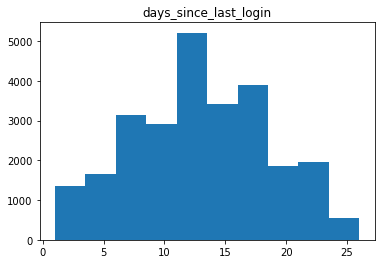

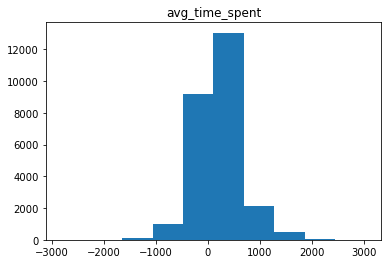

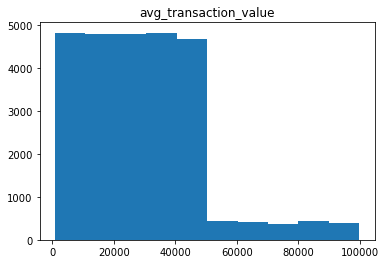

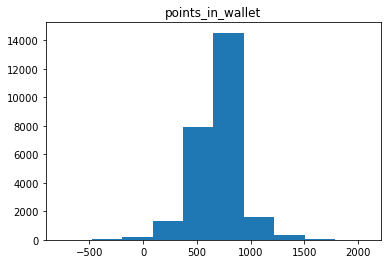

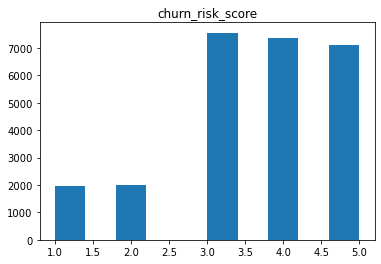

In [93]:
# Have a look at the data to see where we stand
for column in train_df.describe().columns:
    plt.title(column)
    plt.hist(train_df[column], bins=10)
    plt.show()

In [91]:
# Drop age, almost uniformly distruibuted
train_df.drop(['age'], axis=1, inplace=True)
test_df.drop(['age'], axis=1, inplace=True)

In [92]:
# Clean-up days_since_last_login
train_df = train_df[train_df['days_since_last_login'] >= 0.0]

#### Average time spent and points in wallet appear to be skewed Gaussians and are alike. Days since last login is a more symmetrical Gaussian. Average transaction value is bimodal. Churn risk score is biased towards classes 3, 4, 5.

### Feature Engineering
Explore creating new features and do feature selection if needed

In [ ]:
# This is where I would begin dimensionality reduction, likely with PCA to reduce the feature size.
# There is also some Z-scoring that needs to be done, like via the scikit-learn preprocessing module.
# This is a good time to look as cross-correlation matrices for the columns still being considered, and
# if there is a high correlation between certain columns I would prune at least one of them.

### Train/test split
Keep some data separate to get model metrics for evaluation

In [ ]:
# The train_df data will be used for the "train and test" sections. I like K-fold scoring to ensure I am capturing any data drift.
# Since this is not a time-series problem, I can do K-fold without data leakage.

### Model Evaluation and Hyperparameter Tuning
Evaluate what is the best model and tune its parameters

In [ ]:
# Here is the part where I look at ROC curves, specifically AUC and confustion matrices to evaluate quality of models.
# I like using lift curves for input selection and ROC for model comparison.

### Predict on Test Set
Using the trained model predict on the test set given

In [ ]:
# Ideally, the preprocessing steps would be put into a function and both train and test data could be cleaned the same way.
# At this point, I would have output - I do not, in the time alloted here - to present to colleagues for comments.